In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
data='FlavorSense.csv'
df=pd.read_csv(data)
df.head()

,age,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste
0,56.0,Irregular,Heavy,Temperate,NaN,Salty
1,NaN,Night Owl,Heavy,Temperate,Asian,Sweet
2,46.0,Night Owl,Heavy,Cold,Mixed,Sour
3,32.0,Early Bird,Heavy,Cold,Mediterranean,Salty
4,60.0,Night Owl,Moderate,Dry,Mediterranean,Sour


In [224]:
df.shape

(10000, 6)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          9032 non-null   float64
 1   sleep_cycle                  9316 non-null   object 
 2   exercise_habits              9196 non-null   object 
 3   climate_zone                 9467 non-null   object 
 4   historical_cuisine_exposure  9346 non-null   object 
 5   preferred_taste              10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


<Axes: xlabel='age', ylabel='Count'>

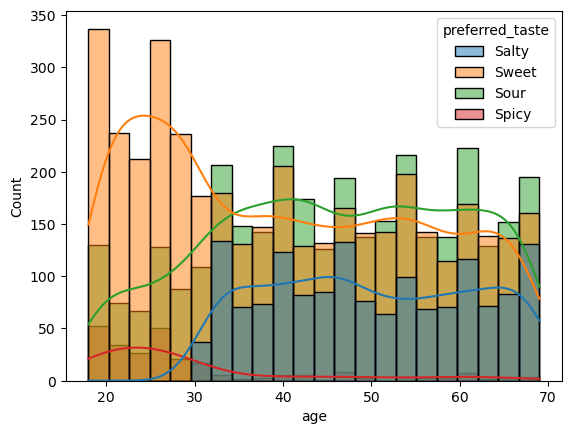

In [226]:
sns.histplot(data=df,x='age',hue='preferred_taste',kde=True)

In [227]:
categorical_df = df.select_dtypes(include=['object', 'category'])

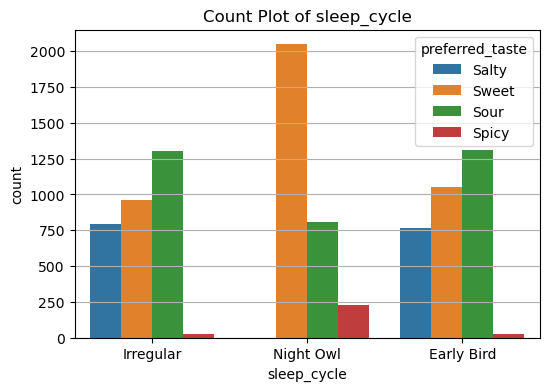

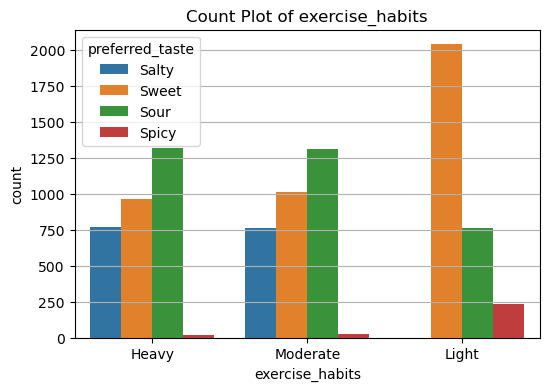

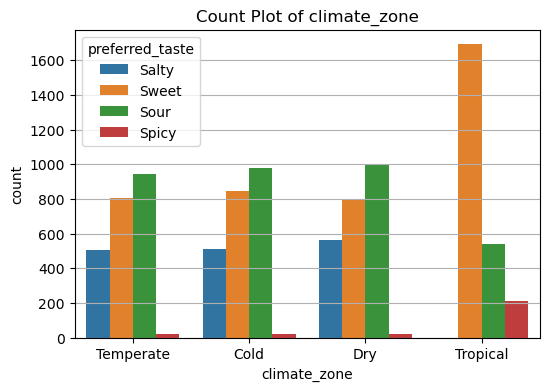

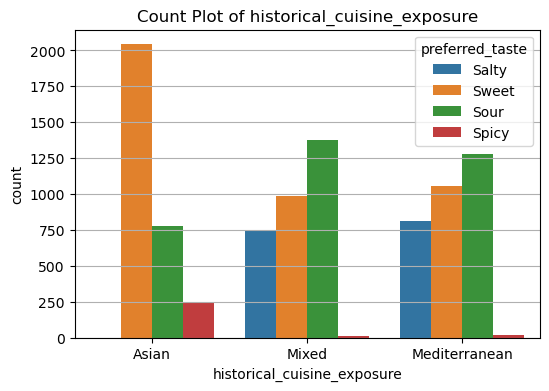

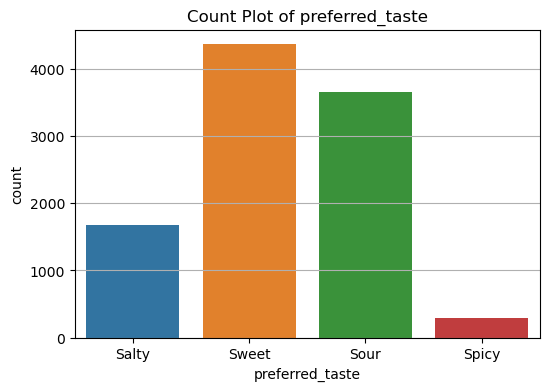

In [228]:
for col in categorical_df.columns:
    plt.figure(figsize=(6,4))
    plt.grid()
    sns.countplot(data=df,x=col,hue='preferred_taste')
    plt.title(f'Count Plot of {col}')

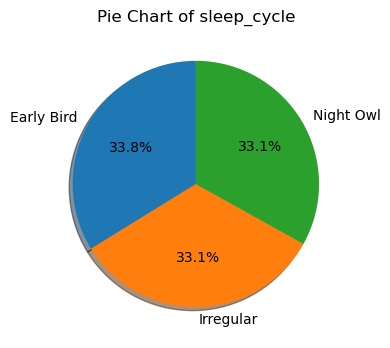

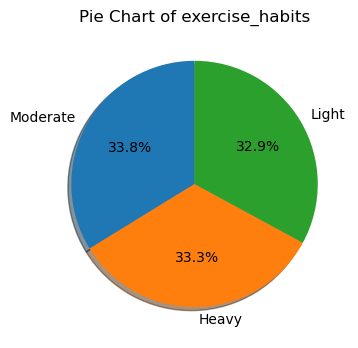

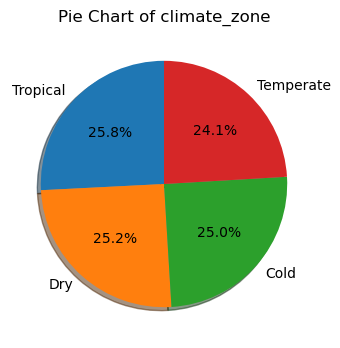

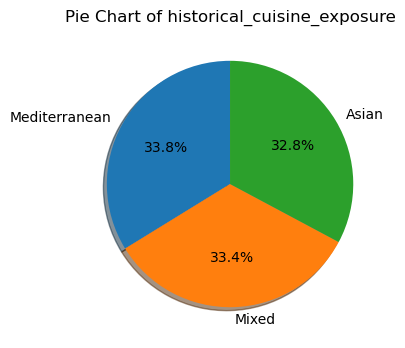

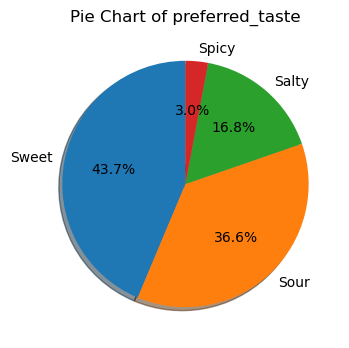

In [229]:
for col in categorical_df.columns:
    plt.figure(figsize=(6,4))
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,shadow=True)
    plt.title(f'Pie Chart of {col}')

<Axes: ylabel='age'>

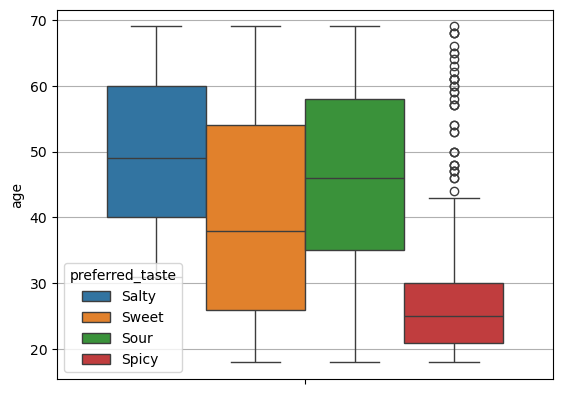

In [230]:
plt.grid()
sns.boxplot(y='age',data=df,hue='preferred_taste')

In [231]:
print(f'precentage of data are missing: \n{"-"*30}\n{df.isnull().mean()*100}')

precentage of data are missing: 
------------------------------
age                            9.68
sleep_cycle                    6.84
exercise_habits                8.04
climate_zone                   5.33
historical_cuisine_exposure    6.54
preferred_taste                0.00
dtype: float64


In [232]:
df['age'] = df.groupby('preferred_taste')['age'].transform(
    lambda x: x.fillna(x.median())
)

In [233]:
cat_cols = ['sleep_cycle', 'exercise_habits', 'climate_zone', 'historical_cuisine_exposure']

for col in cat_cols:
    df[col] = df.groupby('preferred_taste')[col].transform(
        lambda x: x.fillna(x.mode().iloc[0])
    )

In [234]:
df['exercise_habits'].value_counts()

exercise_habits
Heavy       3486
Light       3408
Moderate    3106
Name: count, dtype: int64

In [235]:
from sklearn.preprocessing import OrdinalEncoder
order=[['Light','Moderate','Heavy']]
encoder = OrdinalEncoder(categories=order)
df['exercise_habits_OE']=encoder.fit_transform(df[['exercise_habits']])

In [236]:
df.head()

,age,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste,exercise_habits_OE
0,56.0,Irregular,Heavy,Temperate,Mediterranean,Salty,2.0
1,38.0,Night Owl,Heavy,Temperate,Asian,Sweet,2.0
2,46.0,Night Owl,Heavy,Cold,Mixed,Sour,2.0
3,32.0,Early Bird,Heavy,Cold,Mediterranean,Salty,2.0
4,60.0,Night Owl,Moderate,Dry,Mediterranean,Sour,1.0


In [237]:
df=pd.get_dummies(data=df,columns=['sleep_cycle','climate_zone','historical_cuisine_exposure'],drop_first=True,dtype=int)

In [238]:
df.head()

,age,exercise_habits,preferred_taste,exercise_habits_OE,sleep_cycle_Irregular,sleep_cycle_Night Owl,climate_zone_Dry,climate_zone_Temperate,climate_zone_Tropical,historical_cuisine_exposure_Mediterranean,historical_cuisine_exposure_Mixed
0,56.0,Heavy,Salty,2.0,1,0,0,1,0,1,0
1,38.0,Heavy,Sweet,2.0,0,1,0,1,0,0,0
2,46.0,Heavy,Sour,2.0,0,1,0,0,0,0,1
3,32.0,Heavy,Salty,2.0,0,0,0,0,0,1,0
4,60.0,Moderate,Sour,1.0,0,1,1,0,0,1,0


In [239]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['preferred_taste_encoded']=LE.fit_transform(df['preferred_taste'])

In [240]:
df.head()

,age,exercise_habits,preferred_taste,exercise_habits_OE,sleep_cycle_Irregular,sleep_cycle_Night Owl,climate_zone_Dry,climate_zone_Temperate,climate_zone_Tropical,historical_cuisine_exposure_Mediterranean,historical_cuisine_exposure_Mixed,preferred_taste_encoded
0,56.0,Heavy,Salty,2.0,1,0,0,1,0,1,0,0
1,38.0,Heavy,Sweet,2.0,0,1,0,1,0,0,0,3
2,46.0,Heavy,Sour,2.0,0,1,0,0,0,0,1,1
3,32.0,Heavy,Salty,2.0,0,0,0,0,0,1,0,0
4,60.0,Moderate,Sour,1.0,0,1,1,0,0,1,0,1


In [242]:
df.drop(columns=['exercise_habits','preferred_taste'],inplace=True)

In [243]:
df.head()

,age,exercise_habits_OE,sleep_cycle_Irregular,sleep_cycle_Night Owl,climate_zone_Dry,climate_zone_Temperate,climate_zone_Tropical,historical_cuisine_exposure_Mediterranean,historical_cuisine_exposure_Mixed,preferred_taste_encoded
0,56.0,2.0,1,0,0,1,0,1,0,0
1,38.0,2.0,0,1,0,1,0,0,0,3
2,46.0,2.0,0,1,0,0,0,0,1,1
3,32.0,2.0,0,0,0,0,0,1,0,0
4,60.0,1.0,0,1,1,0,0,1,0,1


In [247]:
X=df.drop('preferred_taste_encoded',axis=1)
y=df['preferred_taste_encoded']

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [318]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [319]:
DT=DecisionTreeClassifier()
KN=KNeighborsClassifier()
RF=RandomForestClassifier()
XG=XGBClassifier()
MLP=MLPClassifier()

In [254]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [271]:
y_hatdt=DT.predict(X_test)

In [272]:
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [273]:
y_hatkn=KN.predict(X_test)

In [274]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [275]:
y_hatrf=RF.predict(X_test)

In [276]:
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [277]:
y_hatxg=XG.predict(X_test)

In [320]:
MLP.fit(X_train,y_train)

C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [321]:
y_hatmlp=MLP.predict(X_test)

In [278]:
from sklearn.metrics import accuracy_score

In [328]:
print("Accuracy Score DecisionTree:",accuracy_score(y_test,y_hatdt))
print("Accuracy Score KNeighbors:",accuracy_score(y_test,y_hatkn))
print("Accuracy Score RandomForest:",accuracy_score(y_test,y_hatrf))
print("Accuracy Score XGBoost:",accuracy_score(y_test,y_hatxg))

Accuracy Score DecisionTree: 0.9472
Accuracy Score KNeighbors: 0.8604
Accuracy Score RandomForest: 0.9488
Accuracy Score XGBoost: 0.9504


In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [327]:
print('Cross validation Score DecisionTree:',cross_val_score(DT,X,y,cv=cv).mean())
print('Cross validation Score KNeighbors:',cross_val_score(KN,X,y,cv=cv).mean())
print('Cross validation Score RandomForest:',cross_val_score(RF,X,y,cv=cv).mean())
print('Cross validation Score XGBoost:',cross_val_score(XG,X,y,cv=cv).mean())

Cross validation Score DecisionTree: 0.9459
Cross validation Score KNeighbors: 0.8462
Cross validation Score RandomForest: 0.9459
Cross validation Score XGBoost: 0.9488


In [315]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_hatdt)
cm2=confusion_matrix(y_test,y_hatkn)
cm3=confusion_matrix(y_test,y_hatrf)
cm4=confusion_matrix(y_test,y_hatxg)

Text(0.5, 1.0, 'Comfusion matrix for XG')

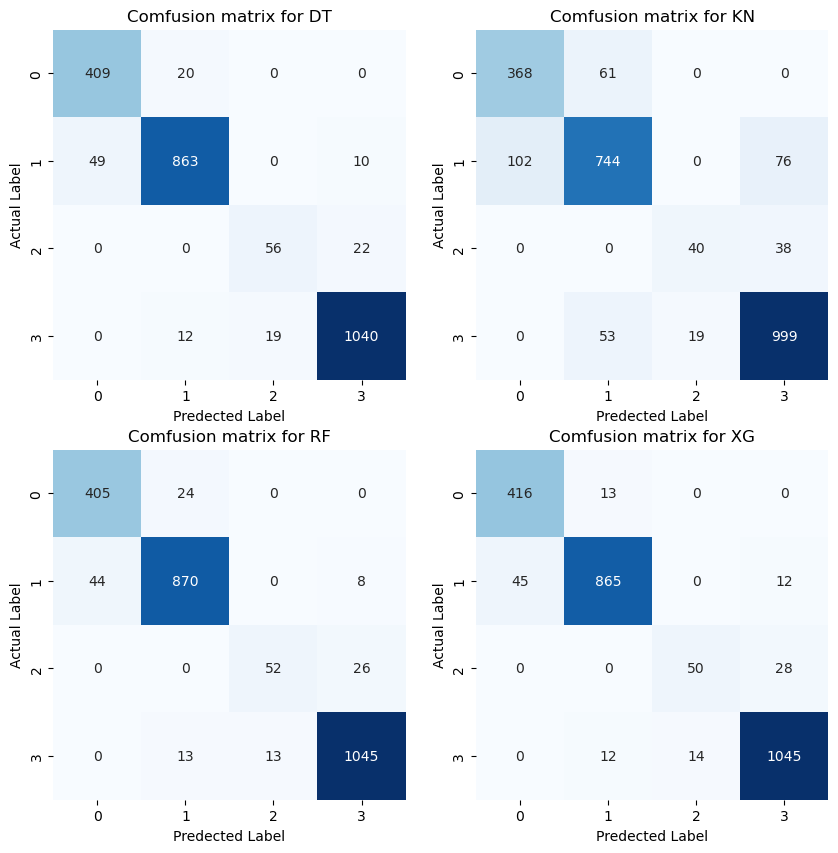

In [308]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predected Label')
plt.ylabel('Actual Label')
plt.title('Comfusion matrix for D')

plt.subplot(222)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predected Label')
plt.ylabel('Actual Label')
plt.title('Comfusion matrix for KN')

plt.subplot(223)
sns.heatmap(cm3,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predected Label')
plt.ylabel('Actual Label')
plt.title('Comfusion matrix for RF')
plt.subplot(224)
sns.heatmap(cm4,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predected Label')
plt.ylabel('Actual Label')
plt.title('Comfusion matrix for XG')